<a href="https://colab.research.google.com/github/FatehinSiddique20/Assignment-2/blob/master/Bikroy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Bikroy/Bikroy_Flat_Rent_Data (3).csv')

In [ ]:
df.head()

,Address,Baths,Beds,Price,Suffix,Size
0,RAJUK PURBACHAL SECTOR-2,3,3,"3,600",per sqft,"1,250"
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4,4,"4,500,000",total price,"1,300"
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3,3,"7,000",per sqft,"1,280"
3,Uttara,4,3,"13,000,000",total price,"1,686"
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",4,3,"6,500",per sqft,"1,880"


#Cleaning Data

In [ ]:
df['Price'] =df.Price.apply(lambda x: x.replace(',',''))
df['Size'] = df.Size.apply(lambda x: x.replace(',',''))

In [ ]:
df['Price'] = df['Price'].astype(str).astype(int)
df['Size']= df['Size'].astype(str).astype(int)
df['Suffix']= df['Suffix'].astype(str).astype(str)

  

In [ ]:
df['Price'].dtypes
df

,Address,Baths,Beds,Price,Suffix,Size
0,RAJUK PURBACHAL SECTOR-2,3,3,3600,per sqft,1250
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4,4,4500000,total price,1300
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3,3,7000,per sqft,1280
3,Uttara,4,3,13000000,total price,1686
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",4,3,6500,per sqft,1880
...,...,...,...,...,...,...
932,GULSHAN Dhaka,6,5,15000,per sqft,4700
933,Basundhara R/A,3,3,6350,per sqft,1550
934,Baridhara diplomatic zone,4,4,22000,per sqft,3500
935,"Address: Holding # 465 , Senpara Porbota, Mirp...",3,3,4800,per sqft,1420


In [ ]:
df.head()

,Address,Baths,Beds,Price,Suffix,Size
0,RAJUK PURBACHAL SECTOR-2,3,3,3600,per sqft,1250
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4,4,4500000,total price,1300
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3,3,7000,per sqft,1280
3,Uttara,4,3,13000000,total price,1686
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",4,3,6500,per sqft,1880


In [ ]:
df['TotalPrice'] = 0
y =df['TotalPrice']
df

,Address,Baths,Beds,Price,Suffix,Size,TotalPrice
0,RAJUK PURBACHAL SECTOR-2,3,3,3600,per sqft,1250,0
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4,4,4500000,total price,1300,0
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3,3,7000,per sqft,1280,0
3,Uttara,4,3,13000000,total price,1686,0
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",4,3,6500,per sqft,1880,0
...,...,...,...,...,...,...,...
932,GULSHAN Dhaka,6,5,15000,per sqft,4700,0
933,Basundhara R/A,3,3,6350,per sqft,1550,0
934,Baridhara diplomatic zone,4,4,22000,per sqft,3500,0
935,"Address: Holding # 465 , Senpara Porbota, Mirp...",3,3,4800,per sqft,1420,0


In [ ]:
ep = df['Suffix'][1]
for i,x in enumerate(df['Suffix']) :
  
  if x == ep:
   
    df['TotalPrice'][i] = df['Price'][i]
  else:
    df['TotalPrice'][i] = df['Price'][i]*df['Size'][i]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,Address,Baths,Beds,Price,Suffix,Size,TotalPrice
0,RAJUK PURBACHAL SECTOR-2,3,3,3600,per sqft,1250,4500000
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4,4,4500000,total price,1300,4500000
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3,3,7000,per sqft,1280,8960000
3,Uttara,4,3,13000000,total price,1686,13000000
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",4,3,6500,per sqft,1880,12220000


In [ ]:
df.shape

(937, 7)

#Finding Missing Entries

In [ ]:
df.isnull().sum()

Address       0
Baths         0
Beds          0
Price         0
Suffix        0
Size          0
TotalPrice    0
dtype: int64

#Finding Location from Address

In [ ]:
import re as re
location = ['Basundhara','Bashundhara','Shaymoli', 'Mirpur', 'Uttara', 'Rampura', 'Mohammadpur', 'Gulshan', 'Dhanmondi', 'Khilgaon', 'Badda', 'Cantonment', 'Banani', 'Keraniganj', 'Baridhara', 'Malibag', 'Mogbazar', 'Khilkhet', 'Savar', 'Jatrabari', 'Basabo', 'Mohakhali', 'Farmgate', 'Banglamotor', 'Ramna', 'Wari', 'Purbachal', 'Sutrapur', 'Motijheel', 'Kafrul', 'Paltan', 'Lalbag', 'Demra', 'Tongi', 'Tejgaon', 'Kamrangirchar', 'Elephant Road', 'Bangshal', 'Chaukbazar', 'Dhamrai', 'Hazaribagh', 'New Market', 'Kotwali', 'Nawabganj', 'Dohar', 'Banani DOHS', 'Mirpur DOHS', 'Mohakhali DOHS', 'Shajahanpur']

In [ ]:
pat = '|'.join(r"\b{}\b".format(x) for x in location)

df['Location'] = df['Address'].str.extract('('+ pat + ')', expand=False, flags=re.I)
print (df)

                                               Address  ...     Location
0                             RAJUK PURBACHAL SECTOR-2  ...    PURBACHAL
1        Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.  ...       Mirpur
2    Plot # 39/1 & 39/1/1, Road No.-04,  Shaymoli, ...  ...     Shaymoli
3                                               Uttara  ...       Uttara
4    Plot: 310, Road No: 10, Block: J, Bashundhara R/A  ...  Bashundhara
..                                                 ...  ...          ...
932                                      GULSHAN Dhaka  ...      GULSHAN
933                                     Basundhara R/A  ...   Basundhara
934                          Baridhara diplomatic zone  ...    Baridhara
935  Address: Holding # 465 , Senpara Porbota, Mirp...  ...       Mirpur
936                                suvastu nazar vally  ...          NaN

[937 rows x 8 columns]


In [ ]:
df.head()

,Address,Baths,Beds,Price,Suffix,Size,TotalPrice,Location
0,RAJUK PURBACHAL SECTOR-2,3,3,3600,per sqft,1250,4500000,PURBACHAL
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4,4,4500000,total price,1300,4500000,Mirpur
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3,3,7000,per sqft,1280,8960000,Shaymoli
3,Uttara,4,3,13000000,total price,1686,13000000,Uttara
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",4,3,6500,per sqft,1880,12220000,Bashundhara


In [ ]:
df.isnull().sum()

Address         0
Baths           0
Beds            0
Price           0
Suffix          0
Size            0
TotalPrice      0
Location      253
dtype: int64

#Removing rows where location is null


In [ ]:
df['Location'] = df['Location'].fillna(0)
filtered_df = df[(df.Baths != 0) & (df.Beds != 0) & (df.Size != 0) & (df.TotalPrice != 0) & (df.Location != 0)]

In [ ]:
df =filtered_df
df.shape

(684, 8)

In [ ]:
df.isnull().sum()

Address       0
Baths         0
Beds          0
Price         0
Suffix        0
Size          0
TotalPrice    0
Location      0
dtype: int64

In [ ]:
df

,Address,Baths,Beds,Price,Suffix,Size,TotalPrice,Location
0,RAJUK PURBACHAL SECTOR-2,3,3,3600,per sqft,1250,4500000,PURBACHAL
1,"Plot-19, Road-23, Block: D, Mirpur 12, Dhaka.",4,4,4500000,total price,1300,4500000,Mirpur
2,"Plot # 39/1 & 39/1/1, Road No.-04, Shaymoli, ...",3,3,7000,per sqft,1280,8960000,Shaymoli
3,Uttara,4,3,13000000,total price,1686,13000000,Uttara
4,"Plot: 310, Road No: 10, Block: J, Bashundhara R/A",4,3,6500,per sqft,1880,12220000,Bashundhara
...,...,...,...,...,...,...,...,...
931,"Solimuddin Market Road , Mirpur-1, Dhaka-1216",4,4,5000000,total price,1500,5000000,Mirpur
932,GULSHAN Dhaka,6,5,15000,per sqft,4700,70500000,GULSHAN
933,Basundhara R/A,3,3,6350,per sqft,1550,9842500,Basundhara
934,Baridhara diplomatic zone,4,4,22000,per sqft,3500,77000000,Baridhara


#Histogram for the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f772268f790>]],
      dtype=object)

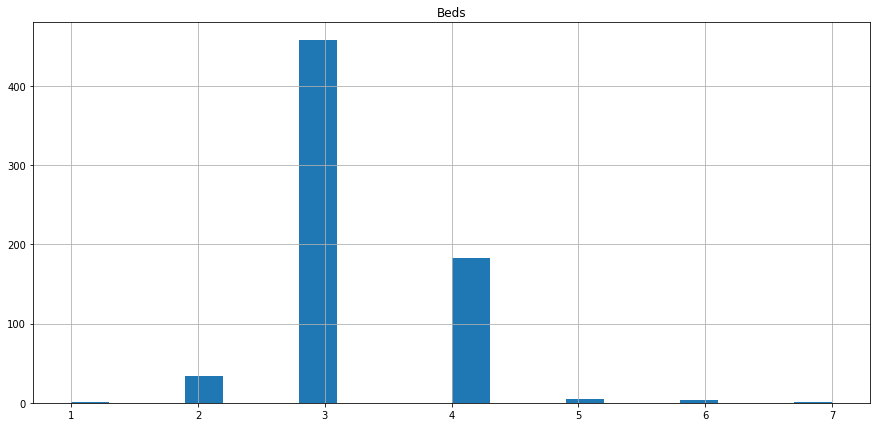

In [ ]:
df.hist(column='Beds',figsize=(15,7), layout=None, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f771bd909d0>]],
      dtype=object)

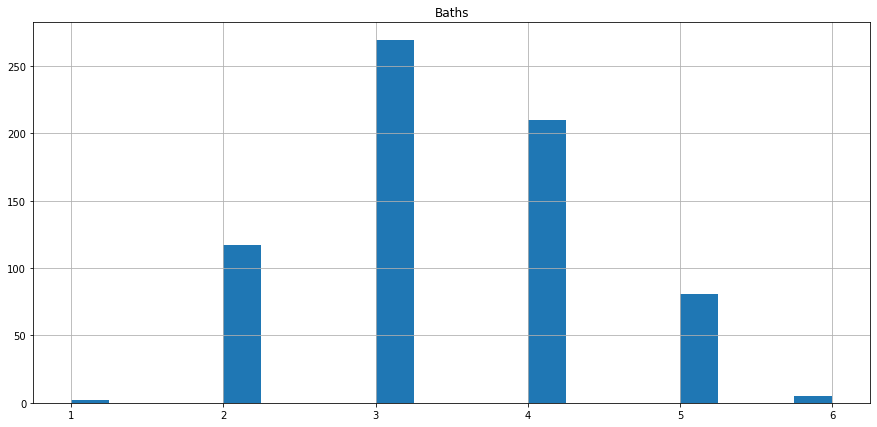

In [ ]:
df.hist(column='Baths',figsize=(15,7), layout=None, bins=20)

#Seaborn Corellation Heat Map

# New Section

In [ ]:
!pip install seaborn
!conda install seaborn

/bin/bash: conda: command not found


In [ ]:
import matplotlib.pyplot as mp
import seaborn as sb

%matplotlib inline
mp.rcParams["figure.figsize"] = [15, 12]


In [ ]:
print(df.corr())

               Baths      Beds     Price      Size  TotalPrice
Baths       1.000000  0.653201  0.123962  0.587108    0.371990
Beds        0.653201  1.000000  0.078431  0.623011    0.422955
Price       0.123962  0.078431  1.000000  0.170974    0.459616
Size        0.587108  0.623011  0.170974  1.000000    0.820586
TotalPrice  0.371990  0.422955  0.459616  0.820586    1.000000


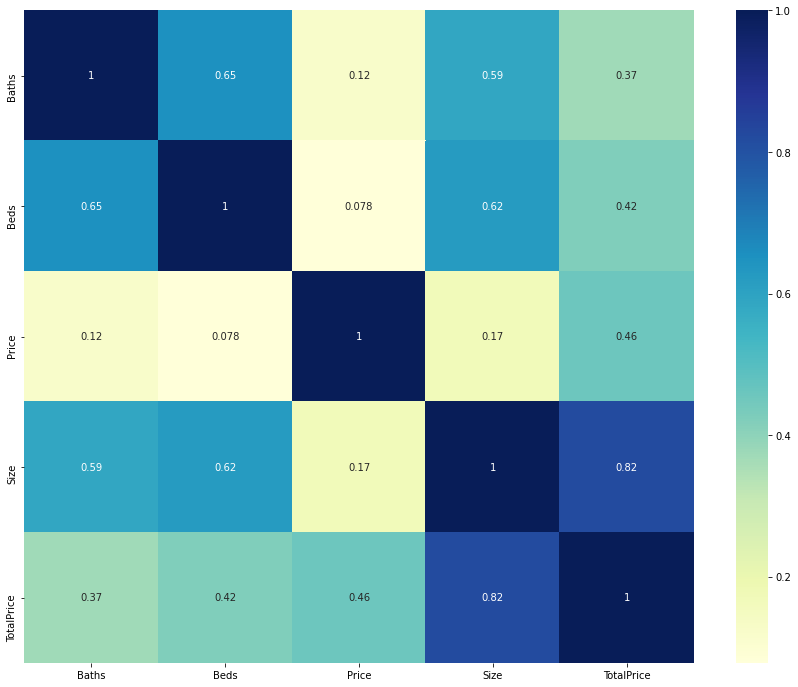

In [ ]:


dataplot = sb.heatmap(df.corr(),cmap="YlGnBu", annot=True)

In [ ]:
df.to_csv(r'BikroyFinal1.csv', index=True)

[]

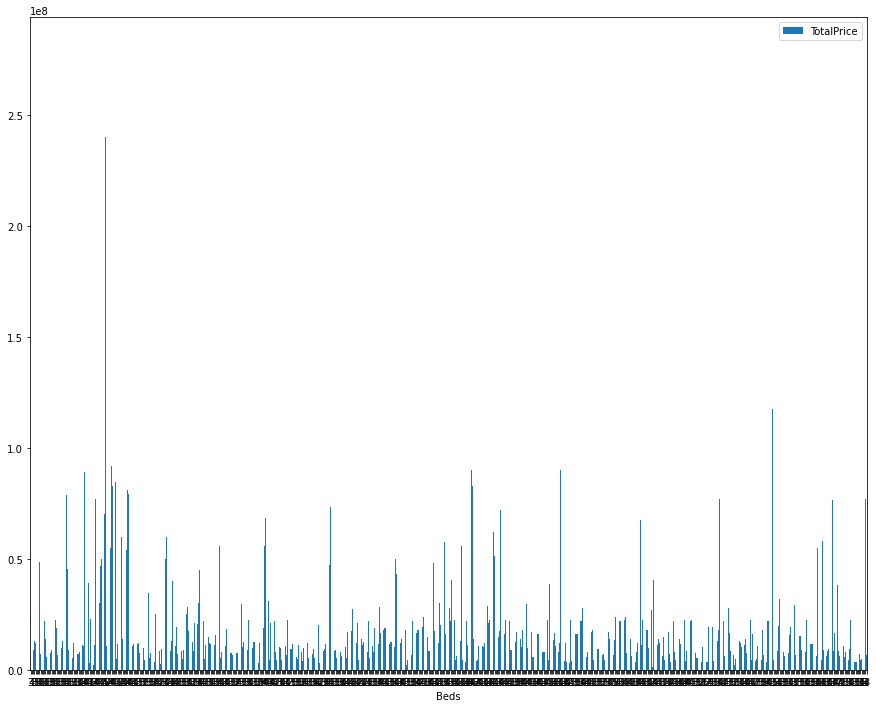

In [ ]:
ax = df.plot.bar(x='Beds',y='TotalPrice',rot=0)
ax.plot()


In [ ]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 46kB/s 
     |████████████████████████████████| 3.6MB 35.8MB/s 
     |████████████████████████████████| 3.5MB 24.0MB/s 
     |████████████████████████████████| 86.4MB 50kB/s 
     |████████████████████████████████| 327kB 40.3MB/s 
     |████████████████████████████████| 18.3MB 252kB/s 
     |████████████████████████████████| 450kB 41.0MB/s 
     |████████████████████████████████| 3.8MB 30.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=30e549749b4bfc0b36a7d8b8ca72a6ae744400244bd2c203bef85c869bb6f798
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=bedd4ec965234a7118dc203645bc8aca2db950f0c29d69151eb0b04ce35e3790
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40a

#Converting Filtered Data from DFrame to Sframe


In [ ]:
import turicreate as tc
data =tc.SFrame('/content/gdrive/My Drive/Bikroy/Bikroy Final.csv')

Finished parsing file /content/gdrive/My Drive/Bikroy/Bikroy Final.csv

Parsing completed. Parsed 100 lines in 0.035967 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,int,int,str,int,int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/gdrive/My Drive/Bikroy/Bikroy Final.csv

Parsing completed. Parsed 684 lines in 0.014901 secs.

###Adding ZipCode

In [ ]:
data.head()

X1,Address,Baths,Beds,Price,Suffix,Size,TotalPrice,Location,ZipCode
1,Gulshan 02,3,3,17500,per sqft,2350,41125000,Gulshan,1212
2,Gulshan Dhaka,4,3,37820000,total price,2440,37820000,Gulshan,1212
3,"249/55,West Mollartak Borttola,Dakkinkhan,beside ...",3,3,6000000,total price,1250,6000000,Uttara,1230
4,"Gausul Azam Avenue,Sector 13, Uttara, Dh ...",3,3,16000000,total price,2257,16000000,Uttara,1230
5,"Ulon Road, Rampura,Dhaka. ...",4,3,7000000,total price,1250,7000000,Rampura,4224
6,"147, South JatrabariDhaka (Near Jatrabari ...",3,3,4900,per sqft,1360,6664000,Jatrabari,1204
7,"Plot # 37, Road #Kallayanpur Main Road ...",5,4,5500,per sqft,1954,10747000,Mirpur,1216
8,mirpur,3,2,4500000,total price,1050,4500000,Mirpur,1216
9,"Sector # 3, Road # 7 @Uttara ...",2,2,7000000,total price,1000,7000000,Uttara,1230
10,Gulshan Dhaka,4,3,40300000,total price,2600,40300000,Gulshan,1212


In [ ]:
tc.visualization.set_target(target='auto')

tc.visualization.scatter(data['Size'], data['TotalPrice'],xlabel='Square Feet Living', ylabel='Price', title='Square Feet Living VS Price')

In [ ]:
data[data['Size']==2300].sort('TotalPrice',False)

X1,Address,Baths,Beds,Price,Suffix,Size,TotalPrice,Location,ZipCode
263,Banani,3,4,280000000,total price,2300,280000000,Banani,1213
382,GULSHAN 2,4,3,34500000,total price,2300,34500000,Gulshan,1212
120,Banani,3,4,28000000,total price,2300,28000000,Banani,1213
524,Banani,3,3,28000000,total price,2300,28000000,Banani,1213
546,"Flat#B2, Rangs Falgooni,9/2 Sir Sayed Road, ...",3,4,10000,per sqft,2300,23000000,Mohammadpur,1207
39,Bashundhara B block,3,3,8500,per sqft,2300,19550000,Bashundhara,1229
336,Bashundhara,5,4,8000,per sqft,2300,18400000,Bashundhara,1229
371,Bashundhara,5,4,8000,per sqft,2300,18400000,Bashundhara,1229
19,Badda Link Road,5,4,17000000,total price,2300,17000000,Badda,1212
548,"Plot# 24, Road# 10,Sector # 04, Uttara m ...",5,4,7100,per sqft,2300,16330000,Uttara,1230


#Creating a Simple Regression Model Size to Total Price


In [ ]:
train_data,test_data = data.random_split(0.8,seed=42)

##Linear Regression Model with sqft feature only

In [ ]:
sqft_model = tc.linear_regression.create(train_data, features=['Size'],target='TotalPrice')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 515

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.001386     | 252200045.369842   | 16272698.792357      | 15087317.719383                 | 8087202.784847                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

###Evaluating the Model

In [ ]:
print (test_data['TotalPrice'].mean)

<bound method SArray.mean of dtype: int
Rows: ?
[37820000, 10747000, 7000000, 18000000, 5503700, 8320000, 4000000, 19550000, 10075000, 70500000, 11713500, 17000000, 18000000, 6205000, 51200000, 18000000, 4186000, 7475000, 14000000, 58140000, 13877500, 3500000, 8288500, 17500000, 16660000, 7875000, 10800000, 6176500, 22339032, 3500000, 13500000, 5145000, 78925000, 60000000, 10807250, 12220000, 30000000, 3605000, 4500000, 12000000, 15835500, 90000000, 22000000, 5145000, 5215500, 11000000, 19289600, 8500000, 55800000, 62050000, 5000000, 12500000, 4494000, 29160000, 22281160, 11500000, 9500000, 11500000, 91875000, 12220000, 7500000, 12000000, 29500000, 30000000, 16740000, 7000000, 12239500, 9106500, 11499996, 80850000, 5145000, 54180000, 8500000, 7355500, 16000000, 7496500, 8990000, 13877500, 19800000, 5900000, 22182450, 60800000, 22000000, 4322500, 4000000, 40425000, 13500000, 22237200, 11000000, 8000000, 6500000, 13000000, 24000000, 28000000, 6816000, 22000000, 4200000, 22000000, 9100000

In [ ]:
print (sqft_model.evaluate(test_data))

{'max_error': 26710732.105421856, 'rmse': 8034614.8879156}


In [ ]:
import matplotlib.pyplot as plt

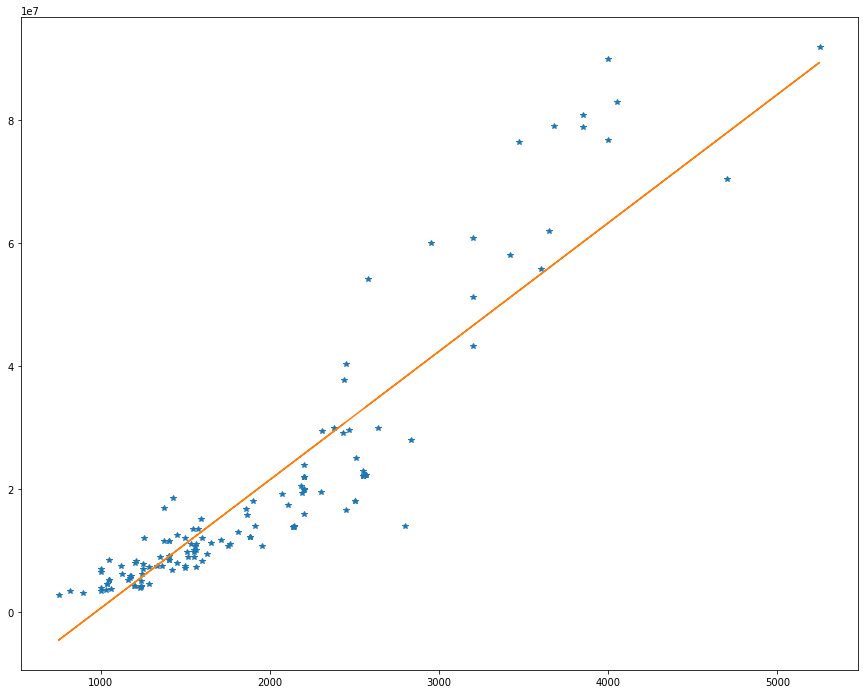

In [ ]:
plt.plot(test_data['Size'],test_data['TotalPrice'],'*',
         test_data['Size'],sqft_model.predict(test_data),'-')

In [ ]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-20214998.609940603,1507996.408226508
Size,None,20876.066626129686,719.0285187604368


###Exploring Other Features

In [ ]:
my_features = ['Baths','Beds','Size','ZipCode']

In [ ]:
tc.visualization.set_target(target='auto')
data[my_features].show()

Materializing SFrame

In [ ]:
print(type(data['ZipCode']))

<class 'turicreate.data_structures.sarray.SArray'>


In [ ]:
dt = data

dt['Location']= dt["Location"].astype(str)
dt['ZipCode']= dt["ZipCode"].astype(str)


In [ ]:
print(type(dt['ZipCode']))

<class 'turicreate.data_structures.sarray.SArray'>


In [ ]:
tc.visualization.box_plot(dt["ZipCode"],  
                          dt["TotalPrice"],  
                          xlabel = "zipcode",  
                          ylabel = "price") 

In [ ]:
tc.visualization.box_plot(dt["Location"],  
                          dt["TotalPrice"],  
                          xlabel = "location",  
                          ylabel = "price") 

In [ ]:
data["ZipCode"] = data["ZipCode"].astype(int)
train_data,test_data = data.random_split(0.8,seed=42)
my_features_model = tc.linear_regression.create(train_data, target='TotalPrice', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 515

Number of features          : 4

Number of unpacked features : 4

Number of coefficients    : 5

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

In [ ]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))

In [ ]:
plt.plot(test_data['Size'],test_data['TotalPrice'],'*',
         test_data['Size'],my_features_model.predict(test_data),'-')

#Building Random Forest Regression Model

In [ ]:
random_forest_model =tc.random_forest_regression.create (train_data,target='TotalPrice',features = my_features,random_seed=42)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest regression:

--------------------------------------------------------

Number of examples          : 515

Number of features          : 4

Number of unpacked features : 4

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 0.008409     | 164486592.000000   | 63000000.000000      | 12925382.000000                 | 19022108.000000                   |

| 2         | 0.011782     | 176032752.000000   | 35604144.000000      | 13128157.000000                 | 12361190.000000                   |

| 3         | 0.013703     | 176466272.000000   | 23940004.000000      | 13225968.000000                 | 10575698.000000                   |

| 4         | 0.017651     | 181349712.000000   | 21136376.000000      | 13332794.000000                 | 8906365.000000                    |

| 5         | 0.019238     | 180546432.000000   | 27021320.000000      | 13061296.000000                 | 10624033.000000                   |

| 10        | 0.030169     | 171473216.000000   | 38800320.000000      | 12832076.000000                 | 13005075.000000                   |

+-----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

In [ ]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))
print(random_forest_model.evaluate(test_data))


{'max_error': 26710732.105421856, 'rmse': 8034614.8879156}
{'max_error': 23988263.153590478, 'rmse': 6959326.79625265}
{'max_error': 19768992.0, 'rmse': 5403820.384989584}


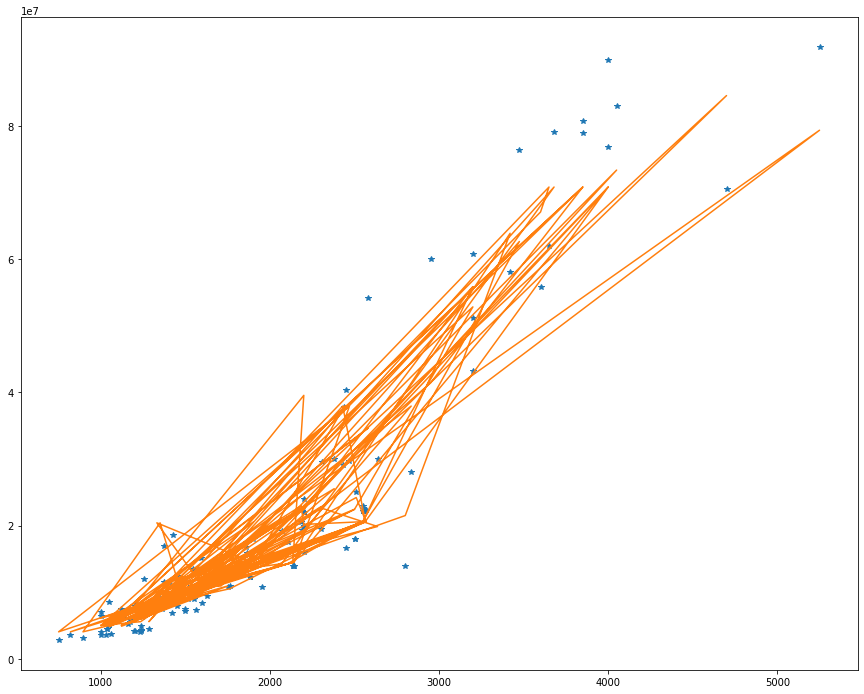

In [ ]:
plt.plot(test_data['Size'],test_data['TotalPrice'],'*',
         test_data['Size'],random_forest_model.predict(test_data),'-')

#Building an auto generated Regression Model

In [ ]:
rand_regression_model=tc.regression.create(train_data,target='TotalPrice',features=my_features)

In [ ]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))
print(random_forest_model.evaluate(test_data))
print(rand_regression_model.evaluate(test_data))

In [ ]:
plt.plot(test_data['Size'],test_data['TotalPrice'],'.',
         test_data['Size'],rand_regression_model.predict(test_data),'-')

#Building Boosted Tree Regression Model

In [ ]:
boosted_tree_regression_model=tc.boosted_trees_regression.create(train_data,target='TotalPrice',features = my_features,random_seed=42)

In [ ]:
print(sqft_model.evaluate(test_data))
print(my_features_model.evaluate(test_data))
print(random_forest_model.evaluate(test_data))
print(rand_regression_model.evaluate(test_data))
print(boosted_tree_regression_model.evaluate(test_data))

In [ ]:
plt.plot(test_data['Size'],test_data['TotalPrice'],'.',
         test_data['Size'],boosted_tree_regression_model.predict(test_data),'-')

#Building Decision Tree Regression Model


In [ ]:
dt_regression_model= tc.decision_tree_regression.create(train_data,'TotalPrice',my_features,random_seed=42)

In [ ]:
print("sqft_model: ",sqft_model.evaluate(test_data))
print("my_features_model: ",my_features_model.evaluate(test_data))
print("random_forest_model: ",random_forest_model.evaluate(test_data))
print("rand_regression_model: ",rand_regression_model.evaluate(test_data))
print("boosted_tree_regression_model: ",boosted_tree_regression_model.evaluate(test_data))
print("dt_regression_model: ",dt_regression_model.evaluate(test_data))

Tuning the max_deapth of Decision Tree Regression

In [ ]:
max_deapth = [1,5,10,15,20,25,30,35,40,45,50]
evaluation = []

for k in max_deapth:
  dt_regression_model= tc.decision_tree_regression.create(train_data,'TotalPrice',my_features,random_seed=42,max_depth=k)
  evaluation = dt_regression_model.evaluate(test_data)
 
  


In [ ]:
evaluation

In [ ]:
dt_regression_model= tc.decision_tree_regression.create(train_data,'TotalPrice',my_features,random_seed=42,max_depth=30)

In [ ]:


print("my_features_model: ",my_features_model.evaluate(test_data))
print("random_forest_model: ",random_forest_model.evaluate(test_data))
print("rand_regression_model: ",rand_regression_model.evaluate(test_data))
print("boosted_tree_regression_model: ",boosted_tree_regression_model.evaluate(test_data))
print("dt_regression_model: ",dt_regression_model.evaluate(test_data))

After trying out different Regression models on this data set, we can see Boosted Tree Regression Model works best on this data set as it has the least RMSE


#Predicting prices of houses

In [ ]:
house1 = data[data['X1']==100]
data.materialize()

In [ ]:
house1

X1,Address,Baths,Beds,Price,Suffix,Size,TotalPrice,Location,ZipCode
100,Mohakhali DOHS,2,3,16000000,total price,1400,16000000,Mohakhali,1212


In [ ]:
my_features_model.predict(house1)

dtype: float
Rows: 1
[12767734.224587396]

In [ ]:
random_forest_model.predict(house1)

dtype: float
Rows: 1
[11583664.0]

In [ ]:
rand_regression_model.predict(house1)

dtype: float
Rows: 1
[13115798.987845656]

In [ ]:
boosted_tree_regression_model.predict(house1)

dtype: float
Rows: 1
[14447322.0]

In [ ]:
dt_regression_model.predict(house1)

dtype: float
Rows: 1
[14425456.0]